In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import util as ut
import fetch_data as fd

import yfinance as yf

In [27]:
# pmdarima
import pmdarima as pm
from pmdarima.arima import decompose
from pmdarima.utils import decomposed_plot
from pmdarima.arima.stationarity import ADFTest
from pmdarima.arima.utils import ndiffs
from pmdarima import model_selection

# statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [5]:
vnq_new = fd.get_stock_data('VNQ')
vnq_new

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-09-29,23.626417,23.692772,23.621678,23.626417,205800,0.000,0
2004-09-30,23.697501,23.853905,23.692762,23.815989,27900,0.000,0
2004-10-01,23.863388,24.289944,23.815994,24.256767,129800,0.000,0
2004-10-04,24.356298,24.432130,24.356298,24.361038,8100,0.000,0
2004-10-05,24.361039,24.408433,24.337340,24.356298,11900,0.000,0
...,...,...,...,...,...,...,...
2021-06-23,102.619723,103.016898,102.351634,102.440994,3682900,0.000,0
2021-06-24,102.820000,102.820000,101.660004,102.220001,3229000,0.729,0
2021-06-25,102.250000,103.010002,102.080002,102.910004,2739100,0.000,0


In [8]:
vnq_val = vnq_new.iloc[-4:]
vnq_val

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-06-24,102.820000,102.820000,101.660004,102.220001,3229000,0.729,0
2021-06-25,102.250000,103.010002,102.080002,102.910004,2739100,0.000,0
2021-06-28,103.089996,103.150002,101.690002,102.610001,3940700,0.000,0
2021-06-29,102.769997,103.199997,102.260002,102.330002,3765550,0.000,0


https://machinelearningmastery.com/save-arima-time-series-forecasting-model-python/

In [10]:
# load model
loaded = ARIMAResults.load('models/arima_statsmodels.pkl')

In [12]:
val = vnq_val['Close']

In [42]:
# Make prediction
forecast, stderr, conf_int = loaded.forecast(steps=4)

In [43]:
forecast

array([103.57757269, 103.56937718, 103.46875799, 103.70252525])

In [33]:
val.values

array([102.22000122, 102.91000366, 102.61000061, 102.33000183])

In [44]:
ut.evaluate(val.values, forecast)

MSE: 1.225 
MAE: 1.062
MAPE:0.010 


In [45]:
val_df = pd.DataFrame(index=val.index,
                      columns=['actual', 'predicted'])

In [47]:
val_df['actual'] = val.values

In [49]:
val_df['predicted'] = forecast

In [50]:
val_df

,actual,predicted
Date,,
2021-06-24,102.220001,103.577573
2021-06-25,102.910004,103.569377
2021-06-28,102.610001,103.468758
2021-06-29,102.330002,103.702525


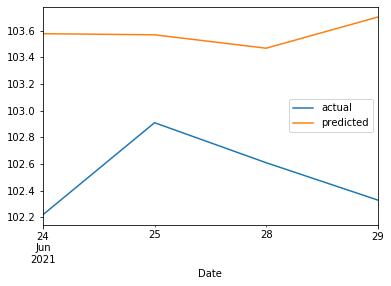

In [52]:
val_df.plot();